# Hands On 1

## Topics
_Audio Processing_

## Personal Identity
|Nama Mahasiswa|Nomor Induk Mahasiswa|
|---|---|
|Kevin Simorangkir|121140150|

## Instructions
1. Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan 5 buah sumber audio yang berbeda:
- Pertama, bersuara pelan. Kedua, relatif bersuara dengan volume sedang. Ketiga, relatif bersuara dengan volume tinggi. Keempat, bersuara volume sedang, namun mengucapkan kata-kata dengan huruf s yang panjang (essssss). Kelima, bersuara volume sedang, mengucapkan kata brrbrbrbrb / lip trill.
- Masing-masing silahkan membuat file wav/mp3/flac yang sesuai dengan ketentuan tersebut (5 file).
- Gunakan waveforms dan spectogram untuk memvisualisasikan ketiga sumber audio tersebut.
- Berikan analisa anda terhadap perbedaan visualisasi audio tersebut.
2. Tanyalah kepada AI-LLM bagaimana membuat teknik fading yang non linear. Implementasikan hal tersebut. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda.
- Untuk mahasiswa ber-nim akhir ganjil, implementasikan teknik fading Logarithmic Scale Fading
- Untuk mahasiswa ber-nim akhir genap, implementasikan teknik fading Exponential
- Lakukan fading untuk bagian awal dan akhir dari audio
3. Dengan menggunakan file audio yang anda rekam sendiri (suara anda), lakukanlah kompresi dan normalisasi hingga loudness LUFS mencapai kira-kira sekitar -14 LUFS. Berikan penjelasan langkah-langkah yang anda lakukan untuk menyelesaikan tugas ini.
4. Rekamlah sebuah audio dengan menggunakan handphone / laptop anda. Cara anda merekam haruslah sedikit unik:
- Anda harus berbicara selama 20 detik.
- Bacaan / percakapan yang anda rekam haruslah berisi informasi mengenai diri anda, seperti nama, asal daerah, hobi, dll.
- Lakukanlah perekaman di dekat sumber noise statis seperti kipas angin, AC, atau kipas laptop anda (atau apapun yang merupakan noise frekuensi tinggi)
- Lakukanlah equalisasi pada audio tersebut dengan menggunakan bandpass. Temukan frekuensi cutoff untuk bandpass yang paling sesuai dengan karakteristik audio yang anda rekam.
- Visualisasikan spektrum frekuensi dari audio sebelum di filter dan setelah di filter (dengan ketiga filter yang telah anda buat).
- Tanyakan pada AI/LLM bagaimana cara membuat noise gate pada audio. Lalu implementasikan noise gate ini pada audio yang telah anda rekam. Jangan lupa copy/paste hasil percakapan anda dengan AI LLM ke notebook anda. Gunakan file audio dari soal nomor 4.
---

## Tahap Persiapan
1. Siapkan Library / Pustaka yang akan digunakan dalam penugasan ini. Dalam hal ini menggunakan 4 (empat) pustaka yaitu sebagai berikut `matplotlib` , `numpy` , `os`, dan `wave`.

In [56]:
import numpy as np #pustaka numpy
import matplotlib.pyplot as plt #pustaka matplotlib
import os #pustaka os
import wave #pustaka wave

2. Mempersiapkan audio yang diminta sesuai `Instructions` . Dalam hal ini telah dipersiapkan untuk file _audio_ nya di _path_ `Technology-Multimedia/Audio`. Dikategorikan menjadi 5 yaitu Low, Medium, Hard, Brrbbrbrb, dan Esss.

## Tahap Eksekusi
1. Mengambil data dari File Audio yang telah disediakan melalui folder `Audio`. Dengan kode program sebagai berikut :

In [57]:
#mengambil data audio
audio_data = os.path.join(os.getcwd(), "Audio", "Esss.wav")
if not os.path.exists(audio_data):  # Check if file exists
    # Print error message if file not found
    print(f"Data dari {audio_data} tidak ditemukan")
    exit()  # Exit if file not found

In [58]:
with wave.open(audio_data, "r") as audio_wave: # Open audio file
    audio_frames = audio_wave.readframes(-1) # Read audio frames
    file_data = np.frombuffer(audio_frames, dtype="int16") # Convert frames to numpy array
    sample_rate = audio_wave.getframerate() # Get sample rate
    channels = audio_wave.getnchannels() # Get number of channels


In [59]:
print(f"Sample rate: {sample_rate} Hz") #menampilkan sample rate
print(f"Channels: {channels}") #menampilkan jumlah channel
print(f"Total frames: {len(file_data)}") #menampilkan total frame
print(f"Duration: {len(file_data) / sample_rate} seconds") #menampilkan durasi

Sample rate: 44100 Hz
Channels: 1
Total frames: 156672
Duration: 3.5526530612244898 seconds


2. Memisahkan data file `audio` menjadi 2 sama dengan kanan dan juga kiri.

In [60]:
file_data = file_data.reshape(-1, channels)  # mengubah bentuk array
print(f"Shape: {file_data.shape}")  # menampilkan bentuk array

if channels == 1:
    audio_kiri = file_data[:, 0]  # mengambil data channel kiri
    audio_kanan = None  # tidak ada channel kanan
    print(f"Audio kiri: {len(audio_kiri)}")  # menampilkan data channel kiri
    print("Audio kanan: Tidak ada (mono audio)")  # menampilkan pesan bahwa tidak ada channel kanan
else:
    audio_kiri = file_data[:, 0]  # mengambil data channel kiri
    audio_kanan = file_data[:, 1]  # mengambil data channel kanan
    print(f"Audio kiri: {len(audio_kiri)}")  # menampilkan data channel kiri
    print(f"Audio kanan: {len(audio_kanan)}")  # menampilkan data channel kanan

Shape: (156672, 1)
Audio kiri: 156672
Audio kanan: Tidak ada (mono audio)


3. Membuat visualisasi dari audio yang ada

In [61]:
sample_audio = len(audio_kiri) #mengambil panjang data audio
detik_audio = np.arange(sample_audio) / sample_rate #mengambil detik audio

print(f"Sample audio: {sample_audio}") #menampilkan sample audio
print(f"Detik audio: {detik_audio}") #menampilkan detik audio

sumbu_waktu = np.linspace(0, sample_audio / sample_rate, sample_audio) #mengambil sumbu waktu
print(f"Sumbu waktu: {sumbu_waktu}") #menampilkan sumbu waktu

Sample audio: 156672
Detik audio: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.55258503e+00
 3.55260771e+00 3.55263039e+00]
Sumbu waktu: [0.00000000e+00 2.26758817e-05 4.53517634e-05 ... 3.55260771e+00
 3.55263039e+00 3.55265306e+00]


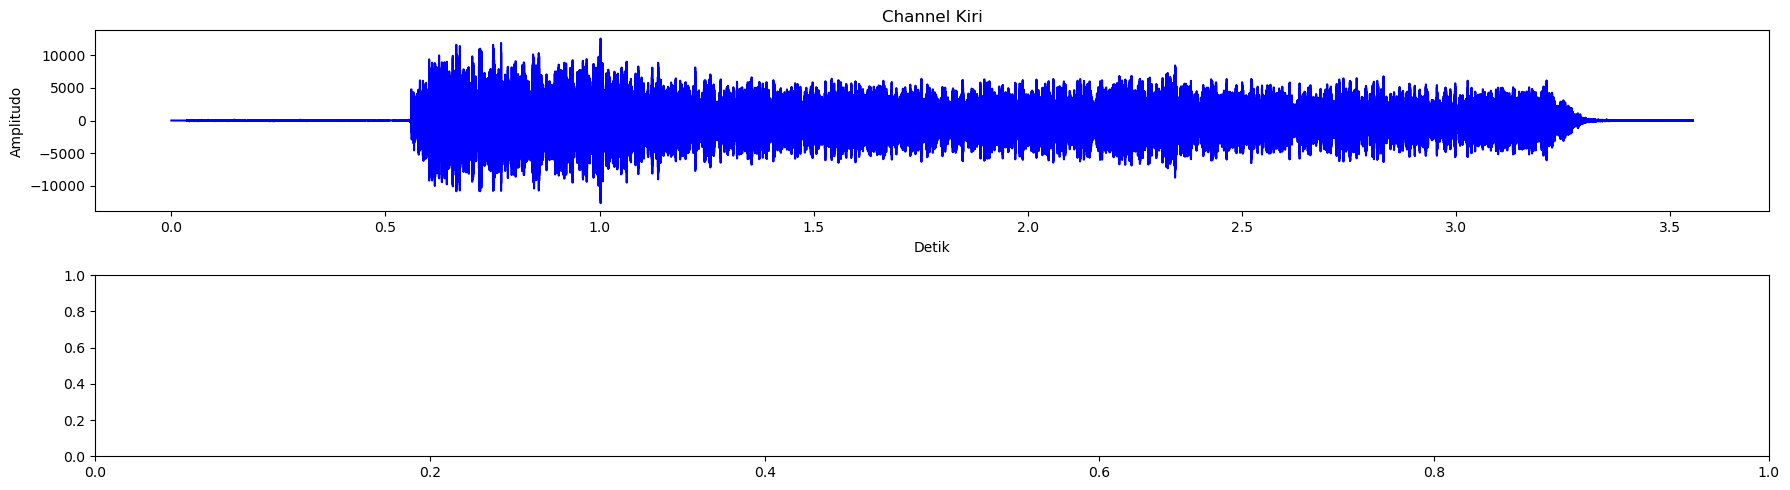

In [62]:
ax, fig= plt.subplots(2, 1, figsize=(18, 5)) #membuat plot
fig[0].plot(sumbu_waktu, audio_kiri, color="blue", label="left") #plot channel kiri
fig[0].set_title("Channel Kiri") #judul plot
fig[0].set_xlabel("Detik") #label x
fig[0].set_ylabel("Amplitudo") #label y

if audio_kanan is not None:
    fig[1].plot(sumbu_waktu, audio_kanan, color="red", label="right") #plot channel kanan
    fig[1].set_title("Channel Kanan") #judul plot
    fig[1].set_xlabel("Detik") #label x
    fig[1].set_ylabel("Amplitudo") #label y

plt.tight_layout() #plot rapi
plt.show() #menampilkan plot

4. Membuat visualisasi dalaman dari pada file audio tersebut. Masih sama dengan menggunakan `audio.wav`

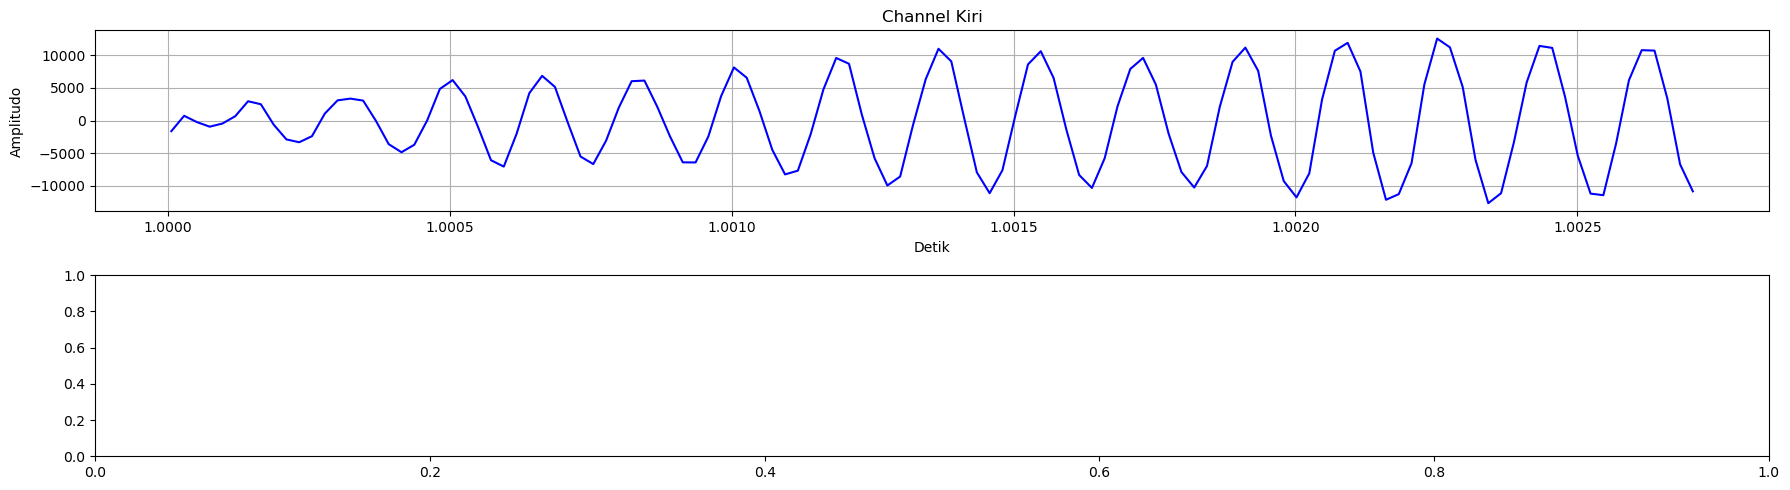

In [63]:
ax, fig= plt.subplots(2, 1, figsize=(18, 5)) #membuat plot
fig[0].plot(sumbu_waktu[44100:44220], audio_kiri[44100:44220], color="blue", label="left")  # plot channel kiri
fig[0].set_title("Channel Kiri") #judul plot
fig[0].set_xlabel("Detik") #label x
fig[0].set_ylabel("Amplitudo") #label y
fig[0].grid()  # menambahkan grid

if audio_kanan is not None:
    fig[1].plot(sumbu_waktu[44100:44220], audio_kanan[44100:44220], color="red", label="right")  # plot channel kanan
    fig[1].set_title("Channel Kanan") #judul plot
    fig[1].set_xlabel("Detik") #label x
    fig[1].set_ylabel("Amplitudo") #label y
    fig[1].grid() #menambahkan grid

plt.tight_layout() #plot rapi
plt.show() #menampilkan plot

In [64]:
print(f"Data dari audio kiri adalah : {audio_kiri[44100:44220]}")  # menampilkan data audio kiri
print(f"Data dari audio kanan adalah : {audio_kanan[44100:44220]}")  # menampilkan data audio kanan


Data dari audio kiri adalah : [ -1628    718   -245   -943   -459    660   2940   2484   -624  -2891
  -3321  -2391   1048   3074   3344   3041    -51  -3612  -4846  -3704
    -23   4816   6172   3659  -1052  -6066  -7038  -2040   4182   6818
   5135   -286  -5499  -6656  -3087   1982   6002   6098   2118  -2427
  -6390  -6405  -2436   3731   8106   6534   1424  -4473  -8233  -7662
  -2101   4748   9550   8661    925  -5757  -9925  -8563   -748   6313
  10954   9030    444  -7924 -11100  -7594    680   8570  10580   6507
  -1385  -8318 -10300  -5749   2156   7863   9560   5492  -2021  -7868
 -10238  -6943   2091   8955  11131   7592  -2296  -9239 -11742  -8069
   3217  10652  11861   7484  -4895 -12106 -11244  -6502   5512  12514
  11174   5112  -6003 -12628 -11105  -3354   5803  11390  11090   3648
  -5381 -11166 -11408  -3475   6145  10744  10675   3385  -6683 -10820]


TypeError: 'NoneType' object is not subscriptable

5. Membuat visualiasi spectogram dari audio yang telah disediakan. Audio dapat dicek pada `path` [Audio](Audio) 

In [67]:
import librosa  # pustaka librosa
import librosa.display  # pustaka librosa.display

In [66]:
audio_data = os.path.join(os.getcwd(), "Audio", "Brrbbrbrb.wav")  # mengambil data audio

In [68]:
audioS, sample_rate = librosa.load(audio_data)  # load data audio
SA = librosa.stft(audioS)  # short-time Fourier transform
SDB = librosa.amplitude_to_db(abs(SA))  # amplitude to decibel

print(f"Audio data: {sample_rate}")  # menampilkan data audio

Audio data: 22050


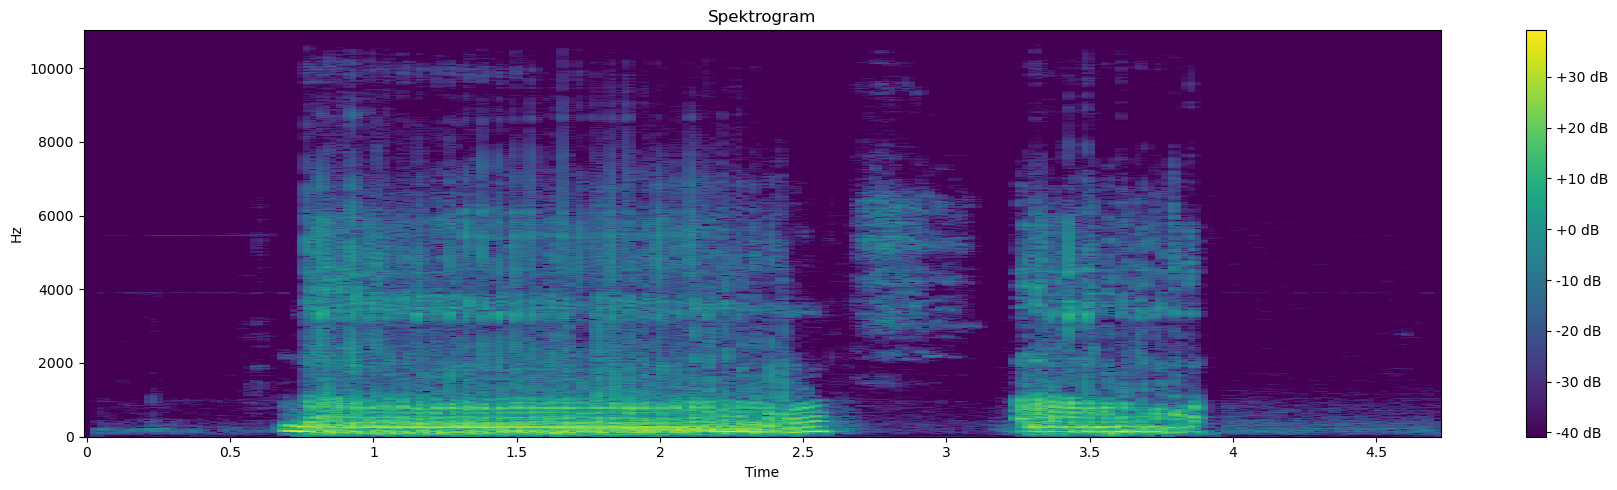

In [69]:
plt.figure(figsize=(18, 5))  # membuat plot
librosa.display.specshow(SDB, sr=sample_rate, x_axis="time", y_axis="hz", cmap="viridis")  # menampilkan spektrogram    
plt.colorbar(format="%+2.0f dB")  # menampilkan colorbar
plt.title("Spektrogram")  # judul plot
plt.tight_layout()  # plot rapi
plt.show()  # menampilkan plot

6. Memotong audio dari data yang sudah ada menggunakan `wave`

In [70]:
with wave.open(audio_data, "r") as audio_wave:  # membuka file audio
    audio_frames = audio_wave.readframes(-1)  # membaca frame audio
    file_data = np.frombuffer(audio_frames, dtype="int16")  # mengubah frame ke array numpy
    sample_rate = audio_wave.getframerate()  # mengambil sample rate
    channels = audio_wave.getnchannels()  # mengambil jumlah channel

file_data = file_data.reshape(-1, channels)  # mengubah bentuk array
print(f"Shape dari file data yang baru: {file_data.shape}")  # menampilkan bentuk array

Shape dari file data yang baru: (207872, 1)


In [72]:
print(f"Isi dari audio sebelah kiri: {file_data[:, 0]}")  # menampilkan isi dari audio sebelah kiri
print(f"Isi dari audio sebelah kanan: {file_data[:, 1]}")  # menampilkan isi dari audio sebelah kanan   

Isi dari audio sebelah kiri: [ 0  0  0 ... 24 29  9]


IndexError: index 1 is out of bounds for axis 1 with size 1

In [73]:
detik_titikawal = 5  # detik titik awal
detik_titikakhir = 10  # detik titik akhir

titikawal = detik_titikawal * sample_rate  # titik awal
titikakhir = detik_titikakhir * sample_rate  # titik akhir

print(f"Titik awal: {titikawal}")  # menampilkan titik awal
print(f"Titik akhir: {titikakhir}")  # menampilkan titik akhir 

Titik awal: 220500
Titik akhir: 441000


In [74]:
trim_audio = file_data[titikawal:titikakhir]  # trim audio
sumbu_waktu_trim = sumbu_waktu[titikawal:titikakhir]  # sumbu waktu trim

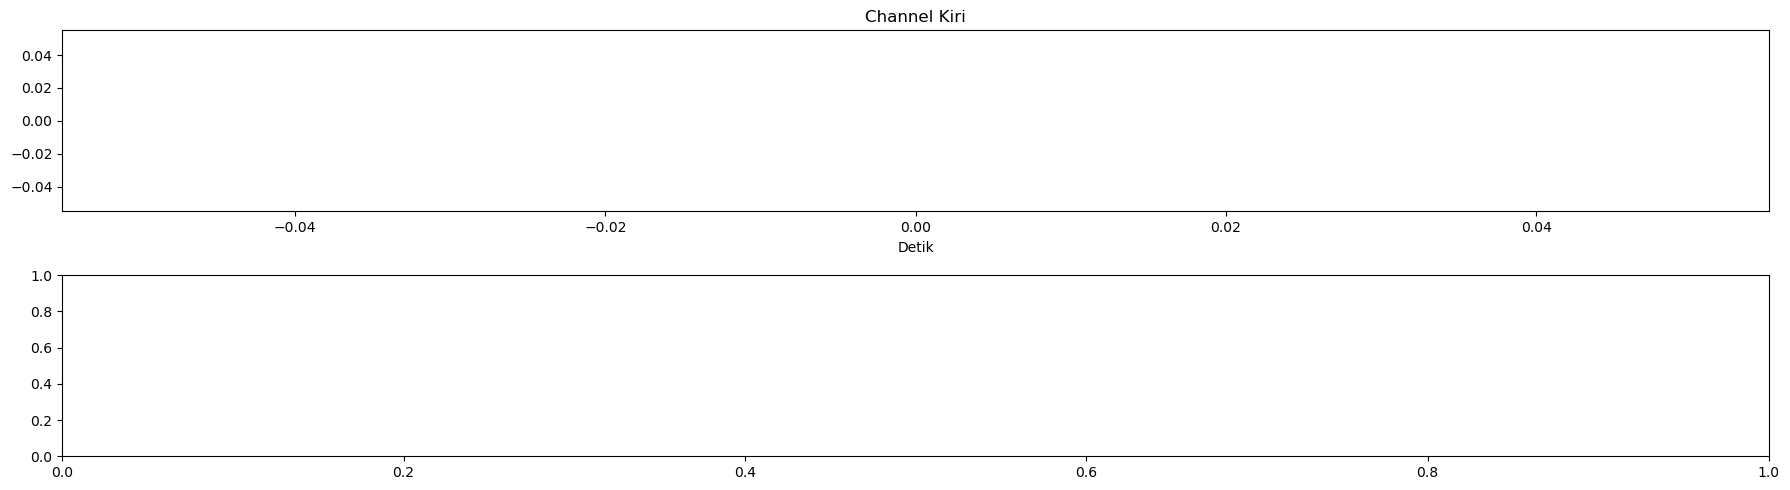

In [75]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5))  # membuat plot
fig[0].plot(sumbu_waktu_trim, trim_audio[:, 0], color="blue", label="left")  # plot channel kiri
fig[0].set_title("Channel Kiri")  # judul plot
fig[0].set_xlabel("Detik")  # label x

if trim_audio.shape[1] > 1:  # Check if there is a right channel
    fig[1].plot(sumbu_waktu_trim, trim_audio[:, 1], color="red", label="right")  # plot channel kanan
    fig[1].set_title("Channel Kanan")  # judul plot
    fig[1].set_xlabel("Detik")  # label x

plt.tight_layout()  # plot rapi
plt.show()  # menampilkan plot